In [14]:
from games.kuhn3 import KuhnPoker3
from agents.counterfactualregret_t import CounterFactualRegret
import matplotlib.pyplot as plt


In [15]:
g = KuhnPoker3()

In [16]:
agent_classes = [CounterFactualRegret, CounterFactualRegret, CounterFactualRegret]
my_agents = {}
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](game=g, agent=agent)

In [17]:
g.reset()
while not g.done():
    g.render()
    print(f"Agent {g.agent_selection}")
    action = my_agents[g.agent_selection].action()
    print(f"Action {action} - move {g.action_move(action)}")
    g.step(action)
g.render()
for agent in g.agents:
    print(f"Reward {agent} = {g.reward(agent)}")

agent_0 Q 
agent_1 K 
agent_2 A 
Agent agent_1
Node does not exist. Playing random.
Action 0 - move p
agent_0 Q p
agent_1 K p
agent_2 A p
Agent agent_2
Node does not exist. Playing random.
Action 0 - move p
agent_0 Q pp
agent_1 K pp
agent_2 A pp
Agent agent_0
Node does not exist. Playing random.
Action 1 - move b
agent_0 Q ppb
agent_1 K ppb
agent_2 A ppb
Agent agent_1
Node does not exist. Playing random.
Action 1 - move b
agent_0 Q ppbb
agent_1 K ppbb
agent_2 A ppbb
Agent agent_2
Node does not exist. Playing random.
Action 1 - move b
agent_0 Q ppbbb
agent_1 K ppbbb
agent_2 A ppbbb
Reward agent_0 = -2
Reward agent_1 = -2
Reward agent_2 = 4


In [18]:
for agent in g.agents:
    print('Training agent ' + agent)
    my_agents[agent].train(10000)
    print(dict(map(lambda n: (n, my_agents[agent].node_dict[n].policy()), my_agents[agent].node_dict.keys())))

Training agent agent_0
{'2': array([9.99086848e-01, 9.13152319e-04]), '0p': array([9.99801153e-01, 1.98846689e-04]), '3pp': array([0.99750583, 0.00249417]), '2ppb': array([0.92555894, 0.07444106]), '0ppbp': array([9.99850850e-01, 1.49149846e-04]), '0ppbb': array([0.5, 0.5]), '3pb': array([0.00326508, 0.99673492]), '2pbp': array([0.99715719, 0.00284281]), '2pbb': array([9.99172567e-01, 8.27432868e-04]), '0b': array([0.00338039, 0.99661961]), '3bp': array([2.00040008e-04, 9.99799960e-01]), '3bb': array([2.00040008e-04, 9.99799960e-01]), '0': array([9.99594567e-01, 4.05432800e-04]), '2p': array([0.44353508, 0.55646492]), '0ppb': array([0.00382507, 0.99617493]), '2ppbp': array([0.0011824, 0.9988176]), '2ppbb': array([9.99791802e-01, 2.08197901e-04]), '0pbp': array([0.99888483, 0.00111517]), '0pbb': array([0.5, 0.5]), '2b': array([0.00721298, 0.99278702]), '1p': array([0.72053391, 0.27946609]), '2pp': array([0.65359656, 0.34640344]), '1ppbp': array([0.24509087, 0.75490913]), '1ppbb': array(

In [19]:
for obs, node in my_agents[agent].node_dict.items():
    print(f"{obs} regrets: {node.cum_regrets}, policy: {node.policy()}")

2 regrets: [    9.29533781 -1301.65273347], policy: [0.9936811 0.0063189]
1p regrets: [-956.42856314    4.45736835], policy: [0.00267891 0.99732109]
3pp regrets: [-1009.55553754     1.65968722], policy: [6.69071222e-04 9.99330929e-01]
2ppb regrets: [-166.14739676    0.625     ], policy: [3.51179548e-04 9.99648820e-01]
1ppbp regrets: [ 1.         -1.03631371], policy: [9.99492608e-01 5.07391531e-04]
1ppbb regrets: [0. 0.], policy: [0.5 0.5]
3pb regrets: [-341.12151614    6.48582416], policy: [0.01018069 0.98981931]
2pbp regrets: [2.70701213 3.62150074], policy: [0.56539692 0.43460308]
2pbb regrets: [ 1.2500000e+00 -1.7527096e+03], policy: [9.99849494e-01 1.50505521e-04]
1b regrets: [ 0.55121077 -3.82064765], policy: [0.99653979 0.00346021]
3bp regrets: [-6.29371476  0.125     ], policy: [1.9496978e-04 9.9980503e-01]
3bb regrets: [-8.15064995e+02  1.25000000e-01], policy: [1.9496978e-04 9.9980503e-01]
0p regrets: [ 1.25000000e-01 -1.67669196e+02], policy: [9.99803033e-01 1.96966713e-04]


In [20]:
cum_rewards = dict(map(lambda agent: (agent, 0.), g.agents))
wins = dict(map(lambda agent: (agent, 0), g.agents))
niter = 2000
for i in range(niter):
    g.reset()
    turn = 0
    while not g.done():
        print('Turn: ', turn)
        print('\tPlayer: ', g.agent_selection)
        print('\tObservation: ', g.observe(g.agent_selection))
        a = my_agents[g.agent_selection].action()
        print('\tAction: ', g._moves[a])
        g.step(action=a)
        turn += 1

    print(f'Game {i+1} - Rewards: {g.rewards}')
    for agent in g.agents:
        cum_rewards[agent] += g.rewards[agent]

    max_reward = max(g.rewards.values())
    winners = [agent for agent, reward in g.rewards.items() if reward == max_reward]

    if len(winners) == 1:
        wins[winners[0]] += 1
        print(f'Winner of Game {i+1}: {winners[0]}')
    else:
        print(f'Game {i+1} ended in a tie between: {winners}')
    
    max_reward = max(g.rewards.values())
    winners = [agent for agent, reward in g.rewards.items() if reward == max_reward]
    if len(winners) == 1: 
        wins[winners[0]] += 1

print(f'Average rewards in {niter} games:', dict(map(lambda agent: (agent, cum_rewards[agent]/niter), g.agents)))
print('Wins:', wins)


Turn:  0
	Player:  agent_1
	Observation:  1
	Action:  p
Turn:  1
	Player:  agent_2
	Observation:  0p
	Action:  p
Turn:  2
	Player:  agent_0
	Observation:  2pp
	Action:  p
Game 1 - Rewards: {'agent_0': np.int64(2), 'agent_1': np.int64(-1), 'agent_2': np.int64(-1)}
Winner of Game 1: agent_0
Turn:  0
	Player:  agent_1
	Observation:  3
	Action:  b
Turn:  1
	Player:  agent_2
	Observation:  2b
	Action:  b
Turn:  2
	Player:  agent_0
	Observation:  0bb
	Action:  p
Game 2 - Rewards: {'agent_0': np.int64(-2), 'agent_1': np.int64(3), 'agent_2': np.int64(-1)}
Winner of Game 2: agent_1
Turn:  0
	Player:  agent_1
	Observation:  1
	Action:  b
Turn:  1
	Player:  agent_2
	Observation:  0b
	Action:  b
Turn:  2
	Player:  agent_0
	Observation:  2bb
	Action:  p
Game 3 - Rewards: {'agent_0': np.int64(3), 'agent_1': np.int64(-2), 'agent_2': np.int64(-1)}
Winner of Game 3: agent_0
Turn:  0
	Player:  agent_1
	Observation:  1
	Action:  p
Turn:  1
	Player:  agent_2
	Observation:  0p
	Action:  p
Turn:  2
	Player:

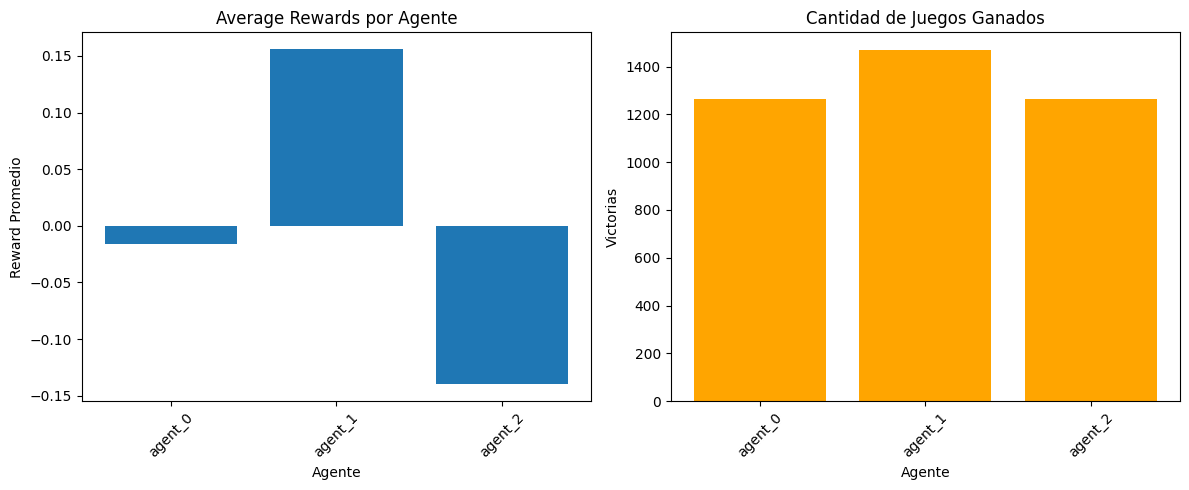

In [21]:
avg_rewards = {agent: cum_rewards[agent] / niter for agent in g.agents}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(avg_rewards.keys(), avg_rewards.values())
axes[0].set_title('Average Rewards por Agente')
axes[0].set_ylabel('Reward Promedio')
axes[0].set_xlabel('Agente')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(wins.keys(), wins.values(), color='orange')
axes[1].set_title('Cantidad de Juegos Ganados')
axes[1].set_ylabel('Victorias')
axes[1].set_xlabel('Agente')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from nbconvert import HTMLExporter
import nbformat, os, time

def save_notebook_to_html(notebook_path=f"KuhnPoker3.ipynb"):
    """Guarda el notebook como HTML"""
    exporter = HTMLExporter()
    notebook = nbformat.read(notebook_path, as_version=4)
    html, _ = exporter.from_notebook_node(notebook)
    
    os.makedirs("notebook_exports", exist_ok=True)
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    output_path = f"notebook_exports/KuhnPoker3_CFRMvsCFRMvsCFRM_{timestamp}.html"
    
    with open(output_path, "w") as f:
        f.write(html)
    
    return output_path

In [ ]:
save_notebook_to_html()